# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [3]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [4]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [5]:
#  1. Get the total rides for each city type
Total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
Total_rides


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [6]:
# 2. Get the total drivers for each city type
Total_drivers= pyber_data_df.groupby(["type"]).sum()["driver_count"]
Total_drivers


type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [7]:
#  3. Get the total amount of fares for each city type
Total_fare = pyber_data_df.groupby(["type"]).sum()["fare"]
Total_fare

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [8]:
#  4. Get the average fare per ride for each city type. 
Average_fare_per_ride = round(pyber_data_df.groupby(["type"]).sum()["fare"]/pyber_data_df.groupby(["type"]).count()["ride_id"],2)
Average_fare_per_ride


type
Rural       34.62
Suburban    30.97
Urban       24.53
dtype: float64

In [9]:
# 5. Get the average fare per driver for each city type. 
Average_fare_per_driver = Total_fare / Total_drivers
Average_fare_per_driver

type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64

In [10]:
#  6. Create a PyBer summary DataFrame. 

pyber_summary_df = pd.DataFrame(list(zip(Total_rides, Total_drivers,Total_fare, Average_fare_per_ride,Average_fare_per_driver)))
pyber_summary_df.index =["rural", "Suburban"," burban"]
pyber_summary_df.columns = ["Total Rides", "Total Drivers", "Total Fares","Average Fare per Ride", "Average Fare per Driver"]
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
rural,125,537,4327.93,34.62,8.059460
Suburban,625,8570,19356.33,30.97,2.258615
burban,1625,59602,39854.38,24.53,0.668675


In [11]:
#  7. Cleaning up the DataFrame. Delete the index name
#pyber_summary_df.index =["rural", "Suburban"," burban"]
#I don't need this

In [12]:
#  8. Format the columns.
format_dict = {'Total Rides': "{0:,.0f}","Total Drivers": "{:20,.0f}",'Total Fares':"${0:,.2f}", 'Average Fare per Ride': '${0:,.2f}', 'Average Fare per Driver': '${0:,.2f}'}
pyber_summary_df.style.format(format_dict)



,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,"8,570","$19,356.33",$30.97,$2.26
burban,"1,625","59,602","$39,854.38",$24.53,$0.67


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [13]:
# 1. Read the merged DataFrame

df = pd.DataFrame(pyber_data_df.groupby(["type","date"]).sum()["fare"])
df.head()

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33

In [14]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.


In [15]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
df = df.reset_index()

df.head()

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33


In [24]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
dfpivot = df.pivot(index = "date", columns = "type", values = "fare")
dfpivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [28]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
#from datetime import datetime
subdfpivot = dfpivot.loc ['2019-01-01':'2019-04-29']
subdfpivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [42]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
subdfpivot.index = pd.to_datetime(subdfpivot.index)
subdfpivot


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [30]:
# 7. Check that the datatype for the index is datetime using df.info()
subdfpivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [43]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
subdfpivotweek = subdfpivot.resample("W").sum()
subdfpivotweek

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [44]:
subdfpivotweek = subdfpivotweek.reset_index()
subdfpivotweek

type,date,Rural,Suburban,Urban
0,2019-01-06,187.92,721.60,1661.68
1,2019-01-13,67.65,1105.13,2050.43
2,2019-01-20,306.00,1218.20,1939.02
3,2019-01-27,179.69,1203.28,2129.51
4,2019-02-03,333.08,1042.79,2086.94
5,2019-02-10,115.80,974.34,2162.64
6,2019-02-17,95.82,1045.50,2235.07
7,2019-02-24,419.06,1412.74,2466.29
8,2019-03-03,175.14,858.46,2218.20
9,2019-03-10,303.94,925.27,2470.93


<Figure size 640x480 with 0 Axes>

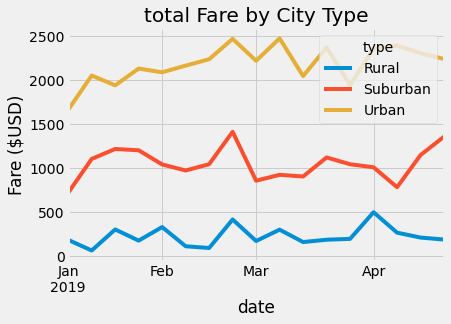

In [69]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
# Setting size of our plot
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

subdfpivotweek.plot(x="date", y=["Rural", "Suburban", "Urban"])
plt.ylabel ( "Fare ($USD)")
plt.title( "total Fare by City Type")
plt.savefig("analysis/PyBer_fare_summary.png")
plt.show()